

Dataset Link : https://archive.ics.uci.edu/ml/datasets/SECOM

Drive Link : https://docs.google.com/spreadsheets/d/1dFCe1zgokabsiEr6BbWmMJtiMefkrChpJWLiG_0dDkk/edit?usp=share_link

In [159]:
# Write your Code here

### `Solution`

In [160]:
import pandas as pd

data = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQtBXo5cBnDsM2fmfHPm6u72KGUS5FjPHNGMxOfYjA9-CAhmnRpwkIw_rOR3sANJIToiUU__6fbBvig/pub?gid=572763137&single=true&output=csv")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


In [161]:
data.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [162]:
df = data.copy()


In [163]:
df1 = df[df.columns[df.isnull().any()]]

In [164]:
df1.fillna(df1.mean(), inplace=True)

<ipython-input-164-95a55e27ad35>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.fillna(df1.mean(), inplace=True)


In [165]:
common_cols = df.columns.intersection(df1.columns)

In [166]:
df[common_cols] = df1[common_cols]

In [167]:
df.isnull().sum().sum()

0

In [168]:
df['Pass/Fail'].value_counts()

,count
Pass/Fail,
-1,1463
1,104


In [169]:
from sklearn.model_selection import train_test_split

In [170]:
object_columns = df.select_dtypes(include=['object']).columns
print(object_columns)

Index(['Time'], dtype='object')


In [171]:
df.drop(columns=object_columns, inplace=True)

In [172]:
x = df.drop(columns = ['Pass/Fail'])
y = df['Pass/Fail']

In [173]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state= 10)

In [174]:
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
850,3215.87,2453.97,2212.8667,1066.9539,0.8161,100.0,101.6156,0.1203,1.3964,0.0065,...,0.005396,97.934373,0.4999,0.0122,0.0037,2.4437,0.0364,0.0172,0.0063,47.2136
247,3043.17,2483.74,2195.7666,1015.3046,1.3663,100.0,101.4600,0.1207,1.4925,-0.0074,...,0.005396,97.934373,0.5009,0.0120,0.0032,2.3974,0.0154,0.0271,0.0104,176.0329
228,2954.10,2489.91,2179.0445,2028.2208,1.5552,100.0,95.4256,0.1234,1.4685,0.0016,...,0.005200,98.112600,0.5035,0.0130,0.0034,2.5797,0.0131,0.0129,0.0052,98.1126
932,3084.23,2433.67,2194.9556,2341.7833,2.3917,100.0,86.8100,0.1231,1.3059,0.0013,...,0.003900,116.682600,0.5013,0.0118,0.0029,2.3559,0.0134,0.0156,0.0039,116.6826
1413,2973.39,2528.67,2195.9778,1388.2869,1.5605,100.0,103.2400,0.1234,1.3622,0.0387,...,0.005396,97.934373,0.5019,0.0135,0.0041,2.6866,0.0378,0.0651,0.0195,171.9936


In [175]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x_train_scaled = scalar.fit_transform(x_train)
x_test_scaled = scalar.transform(x_test)

In [176]:
from sklearn.linear_model import LogisticRegression
logi = LogisticRegression()
logi.fit(x_train_scaled,y_train)

LogisticRegression()

In [177]:
from sklearn.metrics import accuracy_score
y_pred = logi.predict(x_test_scaled)
score = accuracy_score(y_test,y_pred)
print(score)


0.89171974522293


### 1. Duplicate **columns**

In [178]:
def get_duplicate_columns(df):

    duplicate_columns = {}
    seen_columns = {}

    for column in df.columns:
        current_column = df[column]

        # Convert column data to bytes
        try:
            current_column_hash = current_column.values.tobytes()
        except AttributeError:
            current_column_hash = current_column.to_string().encode()

        if current_column_hash in seen_columns:
            if seen_columns[current_column_hash] in duplicate_columns:
                duplicate_columns[seen_columns[current_column_hash]].append(column)
            else:
                duplicate_columns[seen_columns[current_column_hash]] = [column]
        else:
            seen_columns[current_column_hash] = column

    return duplicate_columns

In [179]:
x_train_scaled = pd.DataFrame(x_train_scaled)
x_test_scaled = pd.DataFrame(x_test_scaled)

In [180]:
duplicate_columns = get_duplicate_columns(x_train_scaled)

In [181]:
for one_list in duplicate_columns.values():
    x_train_scaled.drop(columns=one_list, inplace=True)
    x_test_scaled.drop(columns=one_list, inplace=True)

In [182]:
x_train_scaled.shape

(1253, 475)

### 2. Variance Threshold

In [183]:
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0.05)
var_thres.fit(x_train_scaled)

VarianceThreshold(threshold=0.05)

In [184]:
var_thres.get_support()

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [185]:
col = x_train_scaled.columns[var_thres.get_support()]

In [186]:
x_train_scaled = var_thres.transform(x_train_scaled)
x_test_scaled = var_thres.transform(x_test_scaled)

In [187]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=col)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=col)

In [188]:
x_train_scaled.shape

(1253, 474)

### 3. Correlation

<Axes: >

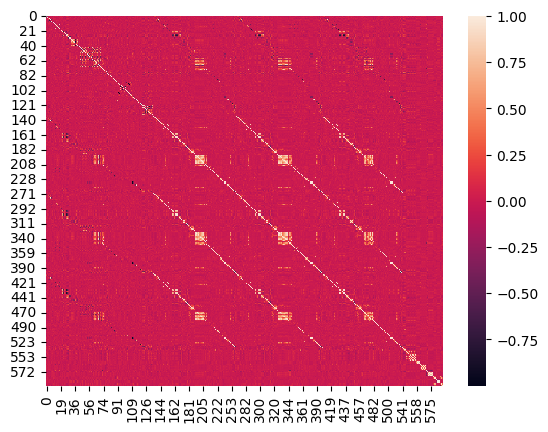

In [189]:
import seaborn as sns
sns.heatmap(x_train_scaled.corr())

In [190]:
corr_matrix = x_train_scaled.corr()

In [191]:
# Get the column names of the DataFrame
columns = corr_matrix.columns

# Create an empty list to keep track of columns to drop
columns_to_drop = []

# Loop over the columns
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        # Access the cell of the DataFrame
        if corr_matrix.loc[columns[i], columns[j]] > 0.95:
            columns_to_drop.append(columns[j])

print(len(columns_to_drop))

300


In [192]:
columns_to_drop=set(columns_to_drop)

In [193]:
x_train_scaled.drop(columns=columns_to_drop,axis = 1,inplace = True)
x_test_scaled.drop(columns=columns_to_drop,axis = 1,inplace = True)

In [194]:
x_train_scaled.shape

(1253, 289)

### 4. ANOVA

In [195]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest


sel = SelectKBest(f_classif, k=100).fit(x_train_scaled, y_train)

# display selected feature names
x_train_scaled.columns[sel.get_support()]

Index([  0,  14,  16,  20,  21,  22,  25,  26,  28,  31,  33,  37,  38,  40,
        43,  56,  58,  59,  63,  64,  65,  66,  67,  68,  70,  76,  78,  79,
        86,  89,  90,  93,  95, 100, 102, 103, 106, 111, 114, 121, 122, 123,
       124, 125, 126, 128, 129, 130, 133, 134, 138, 143, 145, 146, 152, 159,
       160, 163, 164, 170, 172, 175, 180, 181, 183, 188, 196, 197, 198, 200,
       203, 205, 207, 210, 222, 247, 269, 316, 336, 337, 418, 423, 430, 431,
       433, 460, 468, 471, 484, 488, 510, 542, 550, 551, 559, 562, 565, 569,
       573, 582],
      dtype='int64')

In [196]:
col = x_train_scaled.columns[sel.get_support()]

In [197]:
x_train_scaled = sel.transform(x_train_scaled)
x_test_scaled = sel.transform(x_test_scaled)


In [198]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=col)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=col)


In [199]:
x_train_scaled.shape

(1253, 100)

In [201]:
logi = LogisticRegression()
logi.fit(x_train_scaled,y_train)

LogisticRegression()

In [202]:
from sklearn.metrics import accuracy_score
y_pred = logi.predict(x_test_scaled)
score = accuracy_score(y_test,y_pred)
print(score)

0.910828025477707
